# Read dataset

In [74]:
# import libs
import numpy as np
import csv
import matplotlib.pyplot as plt
import scipy
import random
import pandas as pd
from collections import defaultdict

In [24]:
data = pd.read_csv('./all_data_merged.csv')

In [25]:
data.shape

(106804, 198)

In [26]:
# cut data to 100000
data = data[:100000]

In [27]:
data.shape

(100000, 198)

In [31]:
# split training and testing set:
train = data[:70000]
test = data[70000:]

In [32]:
train.shape

(70000, 198)

In [33]:
test.shape

(30000, 198)

In [43]:
train.loc[0]['review_id']

'Q1sbwvVQXV2734tPgoKj4Q'

# Rating prediction: 
1. Baseline: Guessing with mean of total rating score
2. Latent factor model: 
3. Traditional classifier with feature collection
4. BOW & SVM based on review text
5. TextCnn based on review text  
Metric = MSE

In [69]:
# libs
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [60]:
# Training and testing labels
train_y = [d[1]['stars_x'] for d in train.iterrows()]
test_y = [d[1]['stars_x'] for d in test.iterrows()]
len(test_y)

30000

In [64]:
test_y[:5]

[5.0, 5.0, 5.0, 5.0, 5.0]

# Baseline: Predict with Global mean

In [47]:
list(data.columns)

['review_id',
 'user_id',
 'business_id',
 'stars_x',
 'useful_x',
 'funny_x',
 'cool_x',
 'text',
 'date',
 'name_x',
 'address',
 'city',
 'state',
 'postal_code',
 'latitude',
 'longitude',
 'stars_y',
 'review_count_x',
 'is_open',
 'attributes',
 'categories',
 'hours',
 'df_business',
 'Active Life',
 'Specialty Food',
 'Restaurants',
 'Food',
 'Chinese',
 'Ethnic Food',
 'Seafood',
 'Sushi Bars',
 'Japanese',
 'Financial Services',
 'Plumbing',
 'Shopping',
 'Local Services',
 'Home Services',
 'Home & Garden',
 'Printing Services',
 'Beauty & Spas',
 'Hair Salons',
 'Hair Stylists',
 'Barbers',
 'Cosmetics & Beauty Supply',
 'Nail Salons',
 'Day Spas',
 'Massage',
 'Professional Services',
 'IT Services & Computer Repair',
 'Breakfast & Brunch',
 'Mexican',
 'Fast Food',
 'Bars',
 'Nightlife',
 'Pubs',
 'Italian',
 'Pizza',
 'Chicken Wings',
 'Bakeries',
 'Fitness & Instruction',
 'Yoga',
 'Event Planning & Services',
 'Trainers',
 'Health & Medical',
 'Physical Therapy',
 'Gym

In [56]:
# mean of star rating in trainning set
ratingMean = sum([d[1]['stars_x'] for d in train.iterrows()]) / len(train)

In [57]:
ratingMean

3.816185714285714

In [66]:
# predict with Mean
prediction = [ratingMean for d in test.iterrows()]
len(prediction)

30000

In [68]:
# Baseline MSE
mean_squared_error(test_y, prediction)

2.343931824965986

In [70]:
# Baseline MAE
mean_absolute_error(test_y, prediction)

1.296910659047619

In [79]:
# test mean
testMean = sum([d[1]['stars_x'] for d in test.iterrows()]) / len(test)
testMean

3.734

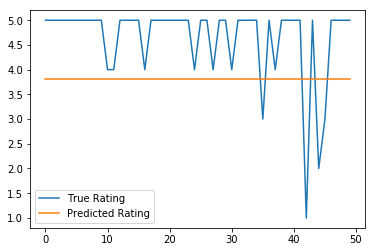

In [77]:
plt.plot(test_y[:50], label='True Rating')
plt.plot(prediction[:50], label='Predicted Rating')
plt.legend()

Baseline MSE: 2.343   
Baseline MAE: 1.296  
Seems like the average rating of test set is different from that in trainning set

# Latent factor model:  
Stronger Baseline in form of y_pred = alpha + gamma_u + gamma_res

In [102]:
# u, b, star rating pairs
ratingTrain = [(d[1]['user_id'], d[1]['business_id'], d[1]['stars_x']) for d in train.iterrows()]
ratingTest = [(d[1]['user_id'], d[1]['business_id'], d[1]['stars_x']) for d in test.iterrows()]

In [92]:
ratingTrain[:5]

[('hG7b0MtEbXx5QzbzE6C_VA', 'ujmEBvifdJM6h6RLv4wQIg', 1.0),
 ('RBXSJA372ilErzNwz0jXvQ', 'ujmEBvifdJM6h6RLv4wQIg', 4.0),
 ('x3brMMbJrAW9PwW5A6YL5w', 'ujmEBvifdJM6h6RLv4wQIg', 1.0),
 ('Skzdl0sWhW88525a1vr59g', 'ujmEBvifdJM6h6RLv4wQIg', 1.0),
 ('3Y25VDfnQVcuc33T-U3Z6A', 'ujmEBvifdJM6h6RLv4wQIg', 5.0)]

In [80]:
# rating per user and rating per item (Based on Trainning set)
ratingPerUser = defaultdict(list)
ratingPerRes = defaultdict(list)
for d in train.iterrows():
    ratingPerUser[d[1]['user_id']].append((d[1]['business_id'], d[1]['stars_x']))
    ratingPerRes[d[1]['business_id']].append((d[1]['user_id'], d[1]['stars_x']))

In [81]:
ratingPerUser

defaultdict(list,
            {'hG7b0MtEbXx5QzbzE6C_VA': [('ujmEBvifdJM6h6RLv4wQIg', 1.0)],
             'RBXSJA372ilErzNwz0jXvQ': [('ujmEBvifdJM6h6RLv4wQIg', 4.0)],
             'x3brMMbJrAW9PwW5A6YL5w': [('ujmEBvifdJM6h6RLv4wQIg', 1.0)],
             'Skzdl0sWhW88525a1vr59g': [('ujmEBvifdJM6h6RLv4wQIg', 1.0)],
             '3Y25VDfnQVcuc33T-U3Z6A': [('ujmEBvifdJM6h6RLv4wQIg', 5.0)],
             'Zy69vXcVIBdCW4dJv_3vSQ': [('ujmEBvifdJM6h6RLv4wQIg', 5.0)],
             'U5e8SydGJmpPJs1_ErAWdw': [('ujmEBvifdJM6h6RLv4wQIg', 1.0)],
             'CHuPGiofxPPIxK5cXAS4qg': [('ujmEBvifdJM6h6RLv4wQIg', 4.0)],
             'HjyfcIOv1PoLJAoqt-J4GQ': [('ujmEBvifdJM6h6RLv4wQIg', 5.0)],
             '46TNf-5T5EcNFRJPYv_nrw': [('ujmEBvifdJM6h6RLv4wQIg', 5.0)],
             '56iEnLi8jR--2ranjPSQ4w': [('ujmEBvifdJM6h6RLv4wQIg', 1.0)],
             'i5aJIiQk91PK9Z0aYJpOrg': [('ujmEBvifdJM6h6RLv4wQIg', 1.0)],
             'MJYkCvxASq9GKEXDrmhB0Q': [('ujmEBvifdJM6h6RLv4wQIg', 1.0)],
             'Pgjzou

In [86]:
# user and business gamma
betaU = {}
betaI = {}
for u in ratingPerUser:
    betaU[u] = 0

for b in ratingPerRes:
    betaI[b] = 0
alpha = ratingMean

In [98]:
# gradient decent
def iterate(lamb):
    newAlpha = 0
    for u,b,r in ratingTrain:
        newAlpha += r - (betaU[u] + betaI[b])
    alpha = newAlpha / len(ratingTrain)
    for u in ratingPerUser:
        newBetaU = 0
        for b,r in ratingPerUser[u]:
            newBetaU += r - (alpha + betaI[b])
        betaU[u] = newBetaU / (lamb + len(ratingPerUser[u]))
    for b in ratingPerRes:
        newBetaI = 0
        for u,r in ratingPerRes[b]:
            newBetaI += r - (alpha + betaU[u])
        betaI[b] = newBetaI / (lamb + len(ratingPerRes[b]))
    mse = 0
    for u,b,r in ratingTrain:
        prediction = alpha + betaU[u] + betaI[b]
        mse += (r - prediction)**2
    regularizer = 0
    for u in betaU:
        regularizer += betaU[u]**2
    for b in betaI:
        regularizer += betaI[b]**2
    mse /= len(ratingTrain)
    return mse, mse + lamb*regularizer

In [99]:
mse,objective = iterate(1)
newMSE,newObjective = iterate(1)
iterations = 2

In [101]:
# try until converge
iterations = 0
while iterations < 10 or objective - newObjective > 0.0001:
    mse, objective = newMSE, newObjective
    newMSE, newObjective = iterate(1)
    iterations += 1
    print("Objective after "
        + str(iterations) + " iterations = " + str(newObjective))
    print("MSE after "
        + str(iterations) + " iterations = " + str(newMSE))

Objective after 1 iterations = 22079.702661945812
MSE after 1 iterations = 0.48319380892679037
Objective after 2 iterations = 22079.698011341625
MSE after 2 iterations = 0.48319380826004926
Objective after 3 iterations = 22079.69378879926
MSE after 3 iterations = 0.4831938084212745
Objective after 4 iterations = 22079.689952850717
MSE after 4 iterations = 0.4831938092844721
Objective after 5 iterations = 22079.686466168747
MSE after 5 iterations = 0.48319381073881024
Objective after 6 iterations = 22079.68329514839
MSE after 6 iterations = 0.4831938126869393
Objective after 7 iterations = 22079.680409524128
MSE after 7 iterations = 0.4831938150435828
Objective after 8 iterations = 22079.677782037517
MSE after 8 iterations = 0.4831938177339842
Objective after 9 iterations = 22079.67538812622
MSE after 9 iterations = 0.4831938206929517
Objective after 10 iterations = 22079.673205659798
MSE after 10 iterations = 0.4831938238636259
Objective after 11 iterations = 22079.671214684608
MSE aft

In [103]:
validMSE = 0
for u,b,r in ratingTest:
    bu = 0
    bi = 0
    if u in betaU:
        bu = betaU[u]
    if b in betaI:
        bi = betaI[b]
    prediction = alpha + bu + bi
    validMSE += (r - prediction)**2

validMSE /= len(ratingTest)
print("Validation MSE = " + str(validMSE))

Validation MSE = 2.246687504708986
